# Training a Classifier

We have seen how to implement one simple classifier. Now let's see how to combine classifiers into a Neural Network. Pytorch has classes that allow us to build Neural Networks without verbose code. Those classes are in the torch.nn module

### Loading Data
For this classifier, we will use a dataset called CIFAR10 which contains 10000 images of 32x32 pixels, correcly classified within ten different categories.

Possible categories
('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
Files already downloaded and verified


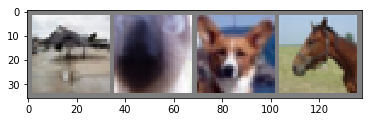

Labels:  plane   cat   dog horse


In [1]:
%matplotlib inline
import demo.data as data

print('Possible categories')
print(data.classes())

# Get the training data
train_data = data.training_data()

# Print a sample batch of 4 pictures, with the labels
data.sample_batch(train_data)

### Training the network
Now we can iterate over our training data a specified amount of times and make sure that our Network gets better at understanding it. In this case we are iterating over the data twice.

In [2]:
import demo.network as neuralnet

# Create our Neural Network
net = neuralnet.NeuralNetwork()

# Train in our training dataset
neuralnet.train(net, train_data, 2)


Starting to train the network
[1,  2000] loss 2.209
[1,  4000] loss 1.886
[1,  6000] loss 1.707
[1,  8000] loss 1.614
[1, 10000] loss 1.535
[1, 12000] loss 1.503
[2,  2000] loss 1.411
[2,  4000] loss 1.392
[2,  6000] loss 1.371
[2,  8000] loss 1.341
[2, 10000] loss 1.327
[2, 12000] loss 1.312
Finished Training


### Checking the output 
After our Network has been trained, it means it now has parameters that it can use to analyze any image. These parameters are just like the weights we've seen in our previous example. But instead of having just one dimension, in this case, they have 32x32x3 dimensions initially and instead of having just one result they have an output of 10 possible results: 


In [3]:
params = list(net.parameters())
print(params)
print(len(params))

[Parameter containing:
tensor([[[[-0.1285, -0.0982, -0.1574, -0.0953,  0.1209],
          [-0.2414, -0.2196, -0.0673, -0.0969,  0.0030],
          [-0.2476, -0.2399, -0.2360, -0.0837, -0.1035],
          [-0.1105, -0.2832, -0.2172, -0.0765, -0.1241],
          [-0.0876, -0.0207, -0.1774,  0.0072,  0.0144]],

         [[ 0.0469,  0.0031, -0.0634,  0.0620, -0.1327],
          [-0.1071, -0.0724, -0.0172,  0.0640, -0.1315],
          [-0.1275,  0.0354, -0.0168, -0.1052, -0.0941],
          [-0.1595,  0.0417, -0.1191, -0.0212, -0.1030],
          [-0.0954, -0.0950,  0.0293, -0.1602, -0.0404]],

         [[ 0.0860,  0.1893,  0.2052,  0.0355,  0.0185],
          [ 0.1689,  0.1257,  0.0795,  0.0587,  0.0880],
          [ 0.2694,  0.2056,  0.1390,  0.0283,  0.2028],
          [ 0.1549,  0.1080,  0.1507,  0.0125,  0.0778],
          [ 0.3076,  0.2354,  0.2698,  0.1063,  0.0929]]],


        [[[ 0.1210,  0.0063,  0.0291,  0.1231, -0.2808],
          [-0.2587, -0.1587, -0.2625, -0.2149, -0.3106],


So now it's time to test our parameters against our initial set of data. We can use our recently trained network in the images from the dataset and see how it performs against the ground truth labels:

Files already downloaded and verified


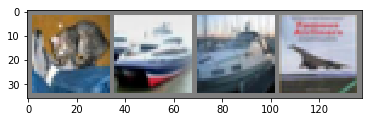

Ground Truth    cat  ship  ship plane
Prediction  plane  ship  ship  ship


In [4]:
import demo.test as tester

# Get our testing dataset
test_data = data.testing_data()
classes = data.classes()

# Test our neural net in one small sample (4 pictures)
(img, truth, prediction) = tester.test_neuralnet_sample(net, test_data, classes)

# Show our results
data.imshow(img)
print('Ground Truth ', truth)
print('Prediction ', prediction)


And we can also run a report of the efficiency of our predictions against the whole dataset

In [5]:
tester.test_neuralnet_all(net, test_data, classes)

Accuracy of the network on the 10000 test images: 52 %
Accuracy of plane : 67 %
Accuracy of   car : 52 %
Accuracy of  bird : 60 %
Accuracy of   cat : 16 %
Accuracy of  deer : 21 %
Accuracy of   dog : 47 %
Accuracy of  frog : 73 %
Accuracy of horse : 60 %
Accuracy of  ship : 70 %
Accuracy of truck : 58 %
